In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from classes import NBATeamRosters
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [82]:
import seaborn as sns

In [107]:
nba_data = NBATeamRosters(season="2024")

In [3]:
# Load the schedule from your CSV file
nba_data.load_schedule('nbaSchedule24.csv')  # Replace with your actual CSV path

Schedule loaded: 1200 games


# Schedule

In [4]:
# Display the full schedule
schedule_df = nba_data.get_full_schedule()
schedule_df.head()

,Game Date,Game ID,Game Time,Arena,Arena City,Home Team Abbreviation,Home Conference,Home Division,Visiting Team Abbreviation,Visiting Conference,Visiting Division,Divisional Game,Conference Game
0,2024-10-22,22400061,7:30 pm ET,TD Garden,Boston,BOS,East,Atlantic,NYK,East,Atlantic,Yes,Yes
1,2024-10-22,22400062,10:00 pm ET,Crypto.com Arena,Los Angeles,LAL,West,Pacific,MIN,West,Northwest,No,Yes
2,2024-10-23,22400067,7:30 pm ET,Scotiabank Arena,Toronto,TOR,East,Atlantic,CLE,East,Central,No,Yes
3,2024-10-23,22400072,10:00 pm ET,Moda Center,Portland,POR,West,Northwest,GSW,West,Pacific,No,Yes
4,2024-10-23,22400071,10:00 pm ET,Intuit Dome,Inglewood,LAC,West,Pacific,PHX,West,Pacific,Yes,Yes


# Today's Games

In [5]:
today_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Retrieve today's games
todays_games = nba_data.get_todays_games("2024-10-22") # Use today_date when in season

In [6]:
todays_games

,Game Date,Game ID,Game Time,Arena,Arena City,Home Team Abbreviation,Home Conference,Home Division,Visiting Team Abbreviation,Visiting Conference,Visiting Division,Divisional Game,Conference Game
0,2024-10-22,22400061,7:30 pm ET,TD Garden,Boston,BOS,East,Atlantic,NYK,East,Atlantic,Yes,Yes
1,2024-10-22,22400062,10:00 pm ET,Crypto.com Arena,Los Angeles,LAL,West,Pacific,MIN,West,Northwest,No,Yes


# Set Game ID

In [7]:
game_id = '22400061'  # Replace with your specific Game ID

# Team Stats

In [87]:
# Set the team abbreviations
home_team_abbr = 'BOS'  # Replace with the actual home team abbreviation
away_team_abbr = 'NYK'  # Replace with the actual away team abbreviation

# Fetch the team stats using the existing method
home_team_stats = nba_data.fetch_team_stats(home_team_abbr, season="2023-24")
away_team_stats = nba_data.fetch_team_stats(away_team_abbr, season="2023-24")

In [88]:
home_team_stats_df = pd.DataFrame([home_team_stats])
away_team_stats_df = pd.DataFrame([away_team_stats])

# Game Rosters

In [89]:
home_roster, away_roster = nba_data.get_teams_and_rosters_for_game(game_id)

# Game Lineups With Stats

In [90]:
# Define the previous season
previous_season = "2023-24"

In [91]:
# Manually select players for the home lineup (using PLAYER_IDs as an example)
home_player_ids = [1628369, 201950, 1627759, 204001,1628401,1630202,1630573,201143]  # Replace with actual player IDs
home_lineup = home_roster[home_roster['PLAYER_ID'].isin(home_player_ids)]

# Manually select players for the away lineup (using PLAYER_IDs as an example)
away_player_ids = [1628973, 1628978, 1630540, 1628384, 1628969,203944,1628404]  # Replace with actual player IDs
away_lineup = away_roster[away_roster['PLAYER_ID'].isin(away_player_ids)]

In [13]:
# Initialize empty lists to store the stats DataFrames
home_lineup_stats_list = []
away_lineup_stats_list = []

# Fetch stats for each player in the home lineup
for index, player in home_lineup.iterrows():
    player_id = player['PLAYER_ID']
    player_stats = nba_data.fetch_player_career_stats(player_id)
    
    if player_stats is not None and not player_stats.empty:
        # Filter to keep only the previous season's stats
        player_stats = player_stats[player_stats['SEASON_ID'] == previous_season]
        home_lineup_stats_list.append(player_stats)

# Combine the list of DataFrames into a single DataFrame
home_lineup_stats = pd.concat(home_lineup_stats_list, ignore_index=True)

# Repeat the process for the away lineup
for index, player in away_lineup.iterrows():
    player_id = player['PLAYER_ID']
    player_stats = nba_data.fetch_player_career_stats(player_id)
    
    if player_stats is not None and not player_stats.empty:
        # Filter to keep only the previous season's stats
        player_stats = player_stats[player_stats['SEASON_ID'] == previous_season]
        away_lineup_stats_list.append(player_stats)

away_lineup_stats = pd.concat(away_lineup_stats_list, ignore_index=True)

In [14]:
# Merge home lineup stats with home lineup to get player names
home_lineup_stats = home_lineup_stats.merge(
    home_lineup[['PLAYER_ID', 'PLAYER']],
    on='PLAYER_ID',
    how='left'
)

# Merge away lineup stats with away lineup to get player names
away_lineup_stats = away_lineup_stats.merge(
    away_lineup[['PLAYER_ID', 'PLAYER']],
    on='PLAYER_ID',
    how='left'
)

In [15]:
# Reorder the columns so that 'PLAYER' is the first column
columns = ['PLAYER'] + [col for col in home_lineup_stats.columns if col != 'PLAYER']
home_lineup_stats = home_lineup_stats[columns]

# Do the same for away_lineup_stats
columns = ['PLAYER'] + [col for col in away_lineup_stats.columns if col != 'PLAYER']
away_lineup_stats = away_lineup_stats[columns]

# Single Player Stats


In [16]:
tatum_stats = nba_data.fetch_player_career_stats(1628369)

In [76]:
tatum_logs = nba_data.fetch_player_game_logs(1628369,"2023")

C:\Users\justi\AppData\Local\Temp\ipykernel_101180\3887499708.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tatum_logs['GAME_DATE'] = pd.to_datetime(tatum_logs['GAME_DATE'])


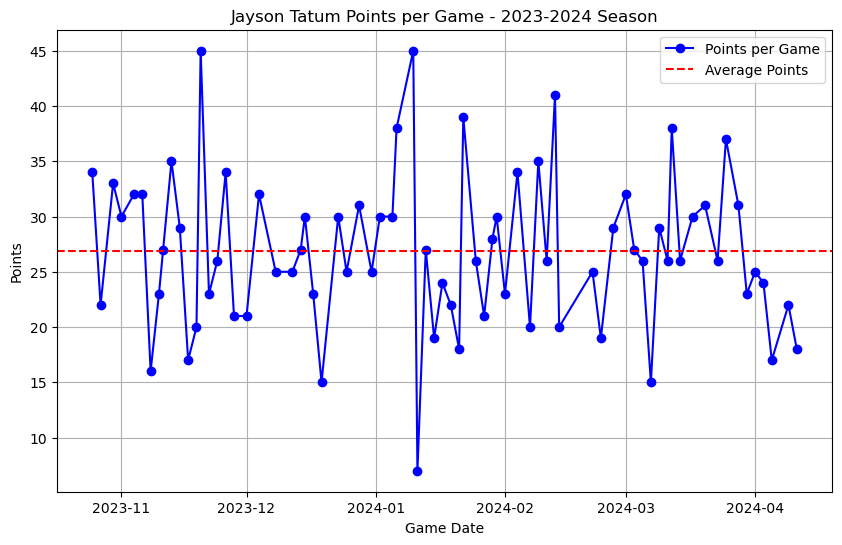

In [79]:
# Ensure that GAME_DATE is in datetime format
tatum_logs['GAME_DATE'] = pd.to_datetime(tatum_logs['GAME_DATE'])

# Plotting the time series of PTS
plt.figure(figsize=(10, 6))
plt.plot(tatum_logs['GAME_DATE'], tatum_logs['PTS'], marker='o', color='b', label='Points per Game')
plt.axhline(tatum_logs['PTS'].mean(), color='r', linestyle='--', label='Average Points')

# Adding labels and title
plt.title('Jayson Tatum Points per Game - 2023-2024 Season')
plt.xlabel('Game Date')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.show()

### Standard Deviation, Variance, and Distribution Analysis

In [84]:
# Calculate mean, variance, and standard deviation
mean_pts = tatum_logs['PTS'].mean()
variance_pts = tatum_logs['PTS'].var()
std_dev_pts = tatum_logs['PTS'].std()

# Calculate the z-scores for each game
tatum_logs['Z_SCORE'] = (tatum_logs['PTS'] - mean_pts) / std_dev_pts

# Define the ranges for standard deviations
std_dev_ranges = [
    (0, 0.5),
    (0.501, 1),
    (1.01, 1.5),
    (1.501, 2),
    (2.01, 2.5),
    (2.501, 3)
]

# Calculate the frequency of games within each standard deviation range
freq_within_std_dev = {
    f'Between {low} SD and {high} SD': tatum_logs[
        (tatum_logs['Z_SCORE'].abs() > low) & (tatum_logs['Z_SCORE'].abs() <= high)
    ].shape[0]
    for low, high in std_dev_ranges
}

# Display the frequency of games within standard deviations
freq_df = pd.DataFrame(list(freq_within_std_dev.items()), columns=['Range', 'Games Count'])
freq_df

,Range,Games Count
0,Between 0 SD and 0.5 SD,30
1,Between 0.501 SD and 1 SD,22
2,Between 1.01 SD and 1.5 SD,12
3,Between 1.501 SD and 2 SD,6
4,Between 2.01 SD and 2.5 SD,0
5,Between 2.501 SD and 3 SD,3


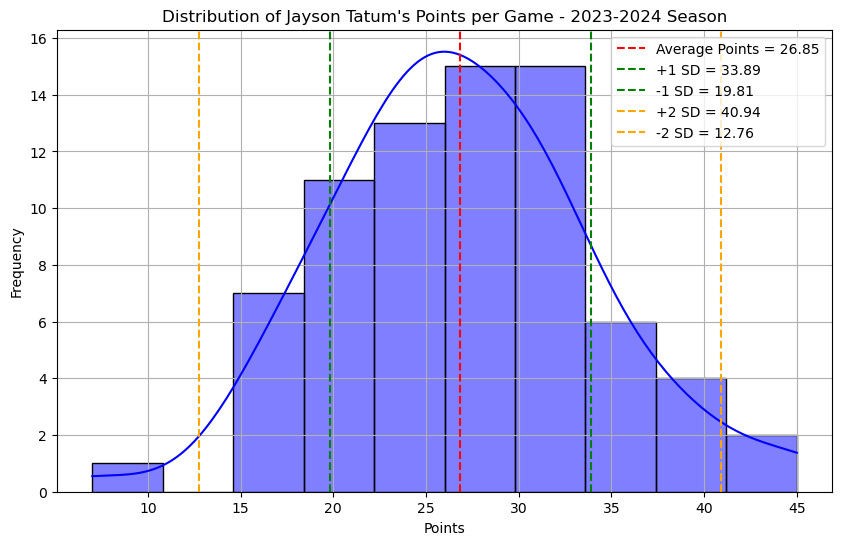

In [85]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(tatum_logs['PTS'], kde=True, color='b')
plt.axvline(mean_pts, color='r', linestyle='--', label=f'Average Points = {mean_pts:.2f}')
plt.axvline(mean_pts + std_dev_pts, color='g', linestyle='--', label=f'+1 SD = {mean_pts + std_dev_pts:.2f}')
plt.axvline(mean_pts - std_dev_pts, color='g', linestyle='--', label=f'-1 SD = {mean_pts - std_dev_pts:.2f}')
plt.axvline(mean_pts + 2 * std_dev_pts, color='orange', linestyle='--', label=f'+2 SD = {mean_pts + 2 * std_dev_pts:.2f}')
plt.axvline(mean_pts - 2 * std_dev_pts, color='orange', linestyle='--', label=f'-2 SD = {mean_pts - 2 * std_dev_pts:.2f}')

# Adding labels and title
plt.title('Distribution of Jayson Tatum\'s Points per Game - 2023-2024 Season')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## PPG Trend

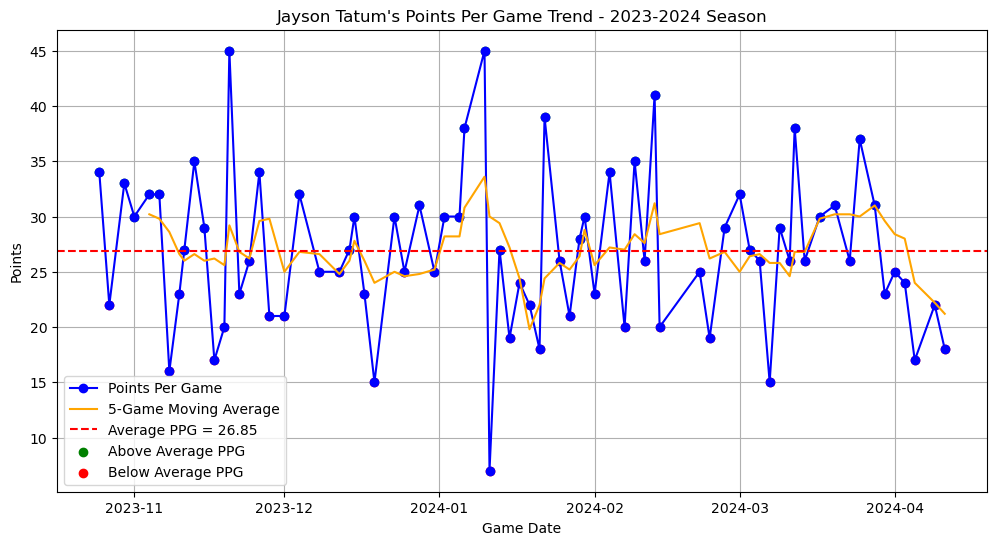

In [86]:
# Assuming tatum_logs contains Tatum's game logs with a 'PTS' column and a 'GAME_DATE' column
tatum_logs['GAME_DATE'] = pd.to_datetime(tatum_logs['GAME_DATE'])

# Sort by game date to ensure the plot is chronological
tatum_logs.sort_values('GAME_DATE', inplace=True)

# Calculate the moving average (e.g., 5-game moving average)
tatum_logs['MOVING_AVG_PPG'] = tatum_logs['PTS'].rolling(window=5).mean()

# Plotting the PPG trend
plt.figure(figsize=(12, 6))
plt.plot(tatum_logs['GAME_DATE'], tatum_logs['PTS'], marker='o', linestyle='-', label='Points Per Game', color='b')
plt.plot(tatum_logs['GAME_DATE'], tatum_logs['MOVING_AVG_PPG'], linestyle='-', label='5-Game Moving Average', color='orange')
plt.axhline(mean_pts, color='r', linestyle='--', label=f'Average PPG = {mean_pts:.2f}')

# Highlight high-scoring streaks (e.g., games where he scored above his average PPG)
high_scoring_streaks = tatum_logs[tatum_logs['PTS'] > mean_pts]
plt.scatter(high_scoring_streaks['GAME_DATE'], high_scoring_streaks['PTS'], color='green', label='Above Average PPG')

# Highlight low-scoring streaks (e.g., games where he scored below his average PPG)
low_scoring_streaks = tatum_logs[tatum_logs['PTS'] < mean_pts]
plt.scatter(low_scoring_streaks['GAME_DATE'], low_scoring_streaks['PTS'], color='red', label='Below Average PPG')

# Adding labels and title
plt.title("Jayson Tatum's Points Per Game Trend - 2023-2024 Season")
plt.xlabel('Game Date')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.show()

# Player Matchup Comparison

In [93]:
home_lineup

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
3,1610612738,2024,00,Jayson Tatum,Jayson,jayson-tatum,0,F-G,6-8,210,"MAR 03, 1998",26.0,7,Duke,1628369,#3 Pick in 2017 Draft
4,1610612738,2024,00,Jrue Holiday,Jrue,jrue-holiday,4,G,6-4,205,"JUN 12, 1990",34.0,15,UCLA,201950,Traded from POR on 10/01/23
5,1610612738,2024,00,Jaylen Brown,Jaylen,jaylen-brown,7,G-F,6-6,223,"OCT 24, 1996",27.0,8,California,1627759,#3 Pick in 2016 Draft
6,1610612738,2024,00,Kristaps Porzingis,Kristaps,kristaps-porzingis,8,F-C,7-2,240,"AUG 02, 1995",29.0,8,Cajasol Sevilla,204001,Traded from WAS on 06/23/23
9,1610612738,2024,00,Derrick White,Derrick,derrick-white,9,G,6-4,190,"JUL 02, 1994",30.0,7,Colorado,1628401,Traded from SAS on 02/10/22
10,1610612738,2024,00,Payton Pritchard,Payton,payton-pritchard,11,G,6-1,195,"JAN 28, 1998",26.0,4,Oregon,1630202,#26 Pick in 2020 Draft
16,1610612738,2024,00,Sam Hauser,Sam,sam-hauser,30,F,6-7,217,"DEC 08, 1997",26.0,3,Virginia,1630573,Signed on 08/13/21
18,1610612738,2024,00,Al Horford,Al,al-horford,42,C-F,6-9,240,"JUN 03, 1986",38.0,17,Florida,201143,Traded from OKC on 06/18/21


In [94]:
away_lineup

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
4,1610612752,2024,00,Donte DiVincenzo,Donte,donte-divincenzo,0,G,6-4,203,"JAN 31, 1997",27.0,6,Villanova,1628978,Signed on 07/08/23
7,1610612752,2024,00,Miles McBride,Miles,miles-mcbride,2,G,6-1,195,"SEP 08, 2000",23.0,3,West Virginia,1630540,Draft Rights Traded from OKC on 07/30/21
8,1610612752,2024,00,Josh Hart,Josh,josh-hart,3,G,6-4,215,"MAR 06, 1995",29.0,7,Villanova,1628404,Traded from POR on 02/09/23
13,1610612752,2024,00,OG Anunoby,OG,og-anunoby,8,F-G,6-7,240,"JUL 17, 1997",27.0,7,Indiana,1628384,Traded from TOR on 12/30/23
14,1610612752,2024,00,Jalen Brunson,Jalen,jalen-brunson,11,G,6-2,190,"AUG 31, 1996",28.0,6,Villanova,1628973,Signed on 07/12/22
19,1610612752,2024,00,Mikal Bridges,Mikal,mikal-bridges,25,G-F,6-6,209,"AUG 30, 1996",28.0,6,Villanova,1628969,Traded from BKN on 07/06/24
20,1610612752,2024,00,Julius Randle,Julius,julius-randle,30,F-C,6-8,250,"NOV 29, 1994",29.0,10,Kentucky,203944,Signed on 07/08/19


In [102]:
home_player_id = 1628369  # Jayson Tatum's player ID
away_player_id = 1628969		   # Example: Another player's ID from the away team

In [103]:
# Fetch the game logs for both players
home_player_logs = nba_data.fetch_player_game_logs(home_player_id, '2023-24')
away_player_logs = nba_data.fetch_player_game_logs(away_player_id, '2023-24')

In [104]:
# Calculate the moving average for points per game for both players
home_player_logs['MOVING_AVG_PPG'] = home_player_logs['PTS'].rolling(window=5).mean()
away_player_logs['MOVING_AVG_PPG'] = away_player_logs['PTS'].rolling(window=5).mean()

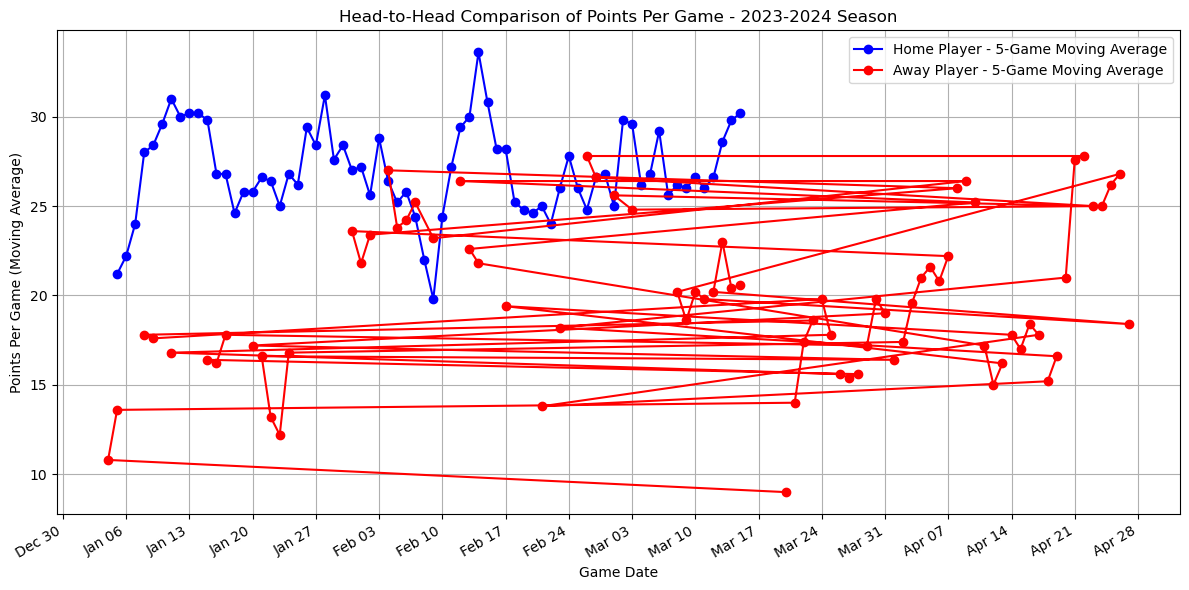

In [105]:
plt.figure(figsize=(12, 6))

# Plotting the home player's PPG trend with markers
plt.plot(home_player_logs['GAME_DATE'], home_player_logs['MOVING_AVG_PPG'], label='Home Player - 5-Game Moving Average', color='blue', marker='o')

# Plotting the away player's PPG trend with markers
plt.plot(away_player_logs['GAME_DATE'], away_player_logs['MOVING_AVG_PPG'], label='Away Player - 5-Game Moving Average', color='red', marker='o')

# Formatting the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotate date labels

# Adding labels and title
plt.title('Head-to-Head Comparison of Points Per Game - 2023-2024 Season')
plt.xlabel('Game Date')
plt.ylabel('Points Per Game (Moving Average)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
# Assume we already have PER, USG%, TS%, and eFG% calculated

# Ensure other metrics like ORtg, DRtg, and WS are also calculated
# We will use placeholders here assuming you already have the functions or data

# Assuming that you have functions or access to ORtg, DRtg, WS
home_player_logs['ORtg'] = home_player_logs.apply(lambda row: calculate_ortg(row, home_team_metrics), axis=1)
home_player_logs['DRtg'] = home_player_logs.apply(lambda row: calculate_drtg(row, away_team_metrics), axis=1)
home_player_logs['WS'] = home_player_logs.apply(lambda row: calculate_win_shares(row, home_team_metrics), axis=1)

away_player_logs['ORtg'] = away_player_logs.apply(lambda row: calculate_ortg(row, away_team_metrics), axis=1)
away_player_logs['DRtg'] = away_player_logs.apply(lambda row: calculate_drtg(row, home_team_metrics), axis=1)
away_player_logs['WS'] = away_player_logs.apply(lambda row: calculate_win_shares(row, away_team_metrics), axis=1)

# Now, summarize the metrics in a DataFrame
home_summary = pd.DataFrame({
    'Metric': ['PER', 'USG%', 'TS%', 'eFG%', 'ORtg', 'DRtg', 'WS'],
    'Home Player': [
        home_player_logs['PER'].mean(),
        home_player_logs['USG%'].mean(),
        home_player_logs['TS%'].mean(),
        home_player_logs['eFG%'].mean(),
        home_player_logs['ORtg'].mean(),
        home_player_logs['DRtg'].mean(),
        home_player_logs['WS'].mean(),
    ]
})

away_summary = pd.DataFrame({
    'Metric': ['PER', 'USG%', 'TS%', 'eFG%', 'ORtg', 'DRtg', 'WS'],
    'Away Player': [
        away_player_logs['PER'].mean(),
        away_player_logs['USG%'].mean(),
        away_player_logs['TS%'].mean(),
        away_player_logs['eFG%'].mean(),
        away_player_logs['ORtg'].mean(),
        away_player_logs['DRtg'].mean(),
        away_player_logs['WS'].mean(),
    ]
})

# Combine into a single DataFrame
comparison_df = pd.merge(home_summary, away_summary, on='Metric')

NameError: name 'calculate_ortg' is not defined

# Add Advanced Stats

In [18]:
def convert_to_per_game_stats(player_stats):
    """
    Converts cumulative stats in a DataFrame to per-game stats.
    
    Args:
        player_stats (pd.DataFrame): The player stats DataFrame with cumulative totals.
    
    Returns:
        pd.DataFrame: A new DataFrame with per-game stats.
    """
    per_game_stats = player_stats.copy()
    
    # Calculate per-game averages for relevant columns
    stats_to_average = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    for stat in stats_to_average:
        per_game_stats[stat] = per_game_stats[stat] / per_game_stats['GP']
    
    return per_game_stats

In [19]:
# Convert home and away player stats to per-game averages
home_lineup_per_game_stats = convert_to_per_game_stats(home_lineup_stats)
away_lineup_per_game_stats = convert_to_per_game_stats(away_lineup_stats)

In [20]:
# Now, let's calculate advanced stats using the per-game averages
home_lineup_per_game_stats['TS%'] = nba_data.calculate_ts_percentage(home_lineup_per_game_stats)
home_lineup_per_game_stats['eFG%'] = nba_data.calculate_efg_percentage(home_lineup_per_game_stats)
# Add other advanced stats as needed...

# Same for the away team
away_lineup_per_game_stats['TS%'] = nba_data.calculate_ts_percentage(away_lineup_per_game_stats)
away_lineup_per_game_stats['eFG%'] = nba_data.calculate_efg_percentage(away_lineup_per_game_stats)
# Add other advanced stats as needed...

In [21]:
def calculate_usg_percentage(row, team_stats):
    fga = row['FGA']
    fta = row['FTA']
    tov = row['TOV']
    minutes = row['MIN']
    
    team_fga = team_stats['FGA'].sum()
    team_fta = team_stats['FTA'].sum()
    team_tov = team_stats['TOV'].sum()
    team_minutes = team_stats['MIN'].sum() * 5  # 5 players on the court
    
    if minutes == 0 or team_minutes == 0:
        return 0  # Return 0 if the minutes or team minutes are zero to avoid division by zero
    
    return 100 * ((fga + 0.44 * fta + tov) * team_minutes) / (minutes * (team_fga + 0.44 * team_fta + team_tov))

# Now apply this function to calculate USG% for each player
home_lineup_per_game_stats['USG%'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_usg_percentage(row, home_lineup_per_game_stats), axis=1)

away_lineup_per_game_stats['USG%'] = away_lineup_per_game_stats.apply(
    lambda row: calculate_usg_percentage(row, away_lineup_per_game_stats), axis=1)

In [22]:
home_lineup_per_game_stats

,PLAYER,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,USG%
0,Jayson Tatum,1628369,2023-24,00,1610612738,BOS,26.0,74,74,35.743243,9.081081,19.270270,0.471,3.094595,8.229730,0.376,5.594595,6.716216,0.833,0.905405,7.216216,8.121622,4.918919,1.013514,0.581081,2.540541,1.959459,26.851351,0.604069,0.551543,715.311137
1,Jrue Holiday,201950,2023-24,00,1610612738,BOS,34.0,69,69,32.797101,4.797101,9.985507,0.480,2.000000,4.666667,0.429,0.869565,1.043478,0.833,1.217391,4.188406,5.405797,4.826087,0.884058,0.768116,1.797101,1.565217,12.463768,0.596659,0.580552,385.337859
2,Jaylen Brown,1627759,2023-24,00,1610612738,BOS,27.0,70,70,33.471429,8.957143,17.942857,0.499,2.071429,5.857143,0.354,3.014286,4.285714,0.703,1.200000,4.328571,5.528571,3.557143,1.185714,0.528571,2.371429,2.642857,23.000000,0.579971,0.556927,684.719583
3,Kristaps Porzingis,204001,2023-24,00,1610612738,BOS,28.0,57,57,29.649123,6.807018,13.192982,0.516,1.929825,5.140351,0.375,4.543860,5.298246,0.858,1.701754,5.473684,7.175439,2.017544,0.736842,1.947368,1.561404,2.736842,20.087719,0.646980,0.589096,594.912049
4,Derrick White,1628401,2023-24,00,1610612738,BOS,29.0,73,73,32.616438,5.301370,11.493151,0.461,2.684932,6.780822,0.396,1.876712,2.082192,0.901,0.698630,3.547945,4.246575,5.164384,1.013699,1.191781,1.534247,2.082192,15.164384,0.611008,0.578069,441.337884
5,Payton Pritchard,1630202,2023-24,00,1610612738,BOS,26.0,82,5,22.268293,3.621951,7.743902,0.468,1.792683,4.658537,0.385,0.560976,0.682927,0.821,0.853659,2.378049,3.231707,3.426829,0.475610,0.073171,0.743902,1.292683,9.597561,0.596538,0.583465,407.428696
6,Sam Hauser,1630573,2023-24,00,1610612738,BOS,26.0,79,13,22.037975,3.151899,7.063291,0.446,2.493671,5.886076,0.424,0.215190,0.240506,0.895,0.569620,2.924051,3.493671,1.037975,0.506329,0.316456,0.405063,1.253165,9.012658,0.628575,0.622760,354.811596
7,Al Horford,201143,2023-24,00,1610612738,BOS,38.0,65,33,26.769231,3.292308,6.446154,0.511,1.661538,3.969231,0.419,0.400000,0.461538,0.867,1.261538,5.092308,6.353846,2.584615,0.584615,0.953846,0.738462,1.430769,8.646154,0.650162,0.639618,284.909500


# Team Advanced Stats

In [23]:
from nba_api.stats.endpoints import teamestimatedmetrics

def fetch_team_estimated_metrics(season, season_type='Regular Season'):
    """
    Fetches estimated advanced metrics for all teams for a given season and season type.
    Args:
        season (str): The NBA season in 'YYYY-YY' format, e.g., '2023-24'.
        season_type (str): The type of season ('Regular Season', 'Playoffs', etc.)

    Returns:
        pd.DataFrame: DataFrame containing the estimated metrics for all teams.
    """
    metrics = teamestimatedmetrics.TeamEstimatedMetrics(
        league_id='00',
        season=season,
        season_type=season_type
    )
    
    metrics_df = metrics.get_data_frames()[0]
    return metrics_df

# Fetch metrics for the 2023-24 season
estimated_metrics_df = fetch_team_estimated_metrics(season="2023-24")


In [24]:
def get_team_metrics_by_id(team_id, metrics_df):
    """
    Filters the team metrics DataFrame for a specific team ID.
    
    Args:
        team_id (int): The team's ID.
        metrics_df (pd.DataFrame): DataFrame containing estimated metrics.
    
    Returns:
        pd.Series: The team's estimated metrics.
    """
    team_metrics = metrics_df.loc[metrics_df['TEAM_ID'] == team_id].iloc[0]
    return team_metrics

In [25]:

home_team_id = nba_data.get_team_id(home_team_abbr)
away_team_id = nba_data.get_team_id(away_team_abbr)

In [26]:
home_team_metrics = get_team_metrics_by_id(home_team_id, estimated_metrics_df)
away_team_metrics = get_team_metrics_by_id(away_team_id, estimated_metrics_df)

In [27]:
home_team_metrics_df = pd.DataFrame([home_team_metrics])
away_team_metrics_df = pd.DataFrame([away_team_metrics])

## Calculate PER

In [47]:
def calculate_player_per(player_stats, team_metrics, league_metrics=None):
    """
    Calculates Player Efficiency Rating (PER) for a player.
    Args:
        player_stats (pd.Series): A series containing the player's stats.
        team_metrics (pd.Series): A series containing the team's metrics (including E_PACE).
        league_metrics (pd.Series or dict): A series or dictionary containing the league's metrics (optional).

    Returns:
        float: The player's Player Efficiency Rating (PER).
    """
    # Simplified formula focusing on main stats
    uPER = (
        player_stats['PTS']
        + player_stats['REB'] * 0.3
        + player_stats['AST'] * 0.3
        + player_stats['STL'] * 0.3
        + player_stats['BLK'] * 0.3
        - player_stats['TOV'] * 0.4
    )
    
    # If league metrics aren't provided, default to using team metrics for scaling
    if league_metrics is None:
        league_pace = team_metrics['E_PACE']
    else:
        league_pace = league_metrics['E_PACE']

    # Calculate PER with simplified scaling by team or league pace
    per = uPER * (team_metrics['E_PACE'] / league_pace)
    return per

In [49]:
home_lineup_per_game_stats['PER'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_player_per(row, home_team_metrics), axis=1
)

## Calculate ORTg

In [53]:
def calculate_player_ortg(player_stats, team_possessions):
    """
    Calculates Offensive Rating (ORtg) for a player.
    Args:
        player_stats (pd.Series): A series containing the player's stats.
        team_possessions (int): The total number of team possessions.

    Returns:
        float: The player's Offensive Rating (ORtg).
    """
    points_produced = player_stats['PTS'] + 0.5 * player_stats['AST']
    ortg = (points_produced / team_possessions) * 100
    return ortg

In [54]:
home_lineup_per_game_stats['ORtg'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_player_ortg(row, home_team_metrics['E_PACE']), axis=1
)

## Calculate DRtg

In [ ]:
""" 
def calculate_player_drtg(player_stats, opponent_possessions):
    """
    Calculates Defensive Rating (DRtg) for a player.
    Args:
        player_stats (pd.Series): A series containing the player's stats.
        opponent_possessions (int): The total number of opponent possessions.
    Returns:
        float: The player's Defensive Rating (DRtg).
    """
    points_allowed = player_stats['PTS_AGAINST']
    drtg = (points_allowed / opponent_possessions) * 100
    return drtg 
"""

In [ ]:
home_lineup_per_game_stats['DRtg'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_player_drtg(row, away_team_metrics['E_PACE']), axis=1
)

## ORB%

In [59]:
def calculate_orb_percentage(player_stats, team_stats, opponent_stats):
    orb = player_stats['OREB']
    team_orb = team_stats['E_OREB_PCT']
    opponent_drb = opponent_stats['E_DREB_PCT']
    orb_percentage = (orb * (team_stats['MIN'] * 5)) / (player_stats['MIN'] * (team_orb + opponent_drb))
    return orb_percentage

In [63]:
home_lineup_per_game_stats['ORB%'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_orb_percentage(row, home_team_metrics, away_team_metrics), axis=1
)

## DRB%

In [60]:
def calculate_drb_percentage(player_stats, team_stats, opponent_stats):
    drb = player_stats['DREB']
    team_drb = team_stats['E_DREB_PCT']
    opponent_orb = opponent_stats['E_OREB_PCT']
    drb_percentage = (drb * (team_stats['MIN'] * 5)) / (player_stats['MIN'] * (team_drb + opponent_orb))
    return drb_percentage

In [64]:
home_lineup_per_game_stats['DRB%'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_drb_percentage(row, home_team_metrics, away_team_metrics), axis=1
)

# AST%

In [72]:
def calculate_ast_percentage(player_stats, team_stats):
    """
    Calculates Assist Percentage (AST%) for a player.
    Args:
        player_stats (pd.Series): A series containing the player's stats.
        team_stats (pd.Series): A series containing the team's stats.

    Returns:
        float: The player's AST%.
    """
    assists = player_stats['AST']
    team_field_goals = team_stats.get('FGM', 0)
    if team_field_goals == 0:
        return 0  # Avoid division by zero
    ast_percentage = 100 * (assists / (team_field_goals - player_stats['FGM']))
    return ast_percentage

In [73]:
home_lineup_per_game_stats['AST%'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_ast_percentage(row, home_team_metrics), axis=1
)

## TOV%

In [62]:
def calculate_tov_percentage(player_stats):
    tov = player_stats['TOV']
    fga = player_stats['FGA']
    fta = player_stats['FTA']
    tov_percentage = 100 * (tov / (fga + 0.44 * fta + tov))
    return tov_percentage

In [66]:
home_lineup_per_game_stats['TOV%'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_tov_percentage(row), axis=1
)

## PIE

In [67]:
def calculate_pie(player_stats, team_stats, opponent_stats):
    player_total = (
        player_stats['PTS'] + player_stats['FGM'] + player_stats['FTM']
        - player_stats['FGA'] - player_stats['FTA']
        + player_stats['OREB'] + player_stats['DREB']
        + player_stats['AST'] + player_stats['STL'] + player_stats['BLK']
        - player_stats['PF'] - player_stats['TOV']
    )
    
    team_total = (
        team_stats['PTS'] + team_stats['FGM'] + team_stats['FTM']
        - team_stats['FGA'] - team_stats['FTA']
        + team_stats['OREB'] + team_stats['DREB']
        + team_stats['AST'] + team_stats['STL'] + team_stats['BLK']
        - team_stats['PF'] - team_stats['TOV']
    )
    
    opponent_total = (
        opponent_stats['PTS'] + opponent_stats['FGM'] + opponent_stats['FTM']
        - opponent_stats['FGA'] - opponent_stats['FTA']
        + opponent_stats['OREB'] + opponent_stats['DREB']
        + opponent_stats['AST'] + opponent_stats['STL'] + opponent_stats['BLK']
        - opponent_stats['PF'] - opponent_stats['TOV']
    )
    
    pie = player_total / (team_total + opponent_total)
    return pie

In [75]:
home_team_stats

{'GROUP_SET': 'Overall',
 'GROUP_VALUE': '2023-24',
 'SEASON_YEAR': '2023-24',
 'GP': 82,
 'W': 64,
 'L': 18,
 'W_PCT': 0.78,
 'MIN': 3966.0,
 'FGM': 3601,
 'FGA': 7396,
 'FG_PCT': 0.487,
 'FG3M': 1351,
 'FG3A': 3482,
 'FG3_PCT': 0.388,
 'FTM': 1334,
 'FTA': 1654,
 'FT_PCT': 0.807,
 'OREB': 876,
 'DREB': 2923,
 'REB': 3799,
 'AST': 2207,
 'TOV': 979.0,
 'STL': 557,
 'BLK': 538,
 'BLKA': 304,
 'PF': 1326,
 'PFD': 1416,
 'PTS': 9887,
 'PLUS_MINUS': 930.0,
 'GP_RANK': 1,
 'W_RANK': 1,
 'L_RANK': 1,
 'W_PCT_RANK': 1,
 'MIN_RANK': 1,
 'FGM_RANK': 1,
 'FGA_RANK': 1,
 'FG_PCT_RANK': 1,
 'FG3M_RANK': 1,
 'FG3A_RANK': 1,
 'FG3_PCT_RANK': 1,
 'FTM_RANK': 1,
 'FTA_RANK': 1,
 'FT_PCT_RANK': 1,
 'OREB_RANK': 1,
 'DREB_RANK': 1,
 'REB_RANK': 1,
 'AST_RANK': 1,
 'TOV_RANK': 1,
 'STL_RANK': 1,
 'BLK_RANK': 1,
 'BLKA_RANK': 1,
 'PF_RANK': 1,
 'PFD_RANK': 1,
 'PTS_RANK': 1,
 'PLUS_MINUS_RANK': 1}

In [68]:
home_lineup_per_game_stats['PIE'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_pie(row, home_team_metrics, away_team_metrics), axis=1
)

KeyError: 'PTS'

BPM

In [69]:
def calculate_bpm(player_stats, team_stats, league_stats):
    bpm = (
        player_stats['PTS'] + player_stats['AST'] * 0.5
        - player_stats['TOV'] * 0.5 - player_stats['PF'] * 0.5
        + player_stats['STL'] * 0.5 + player_stats['BLK'] * 0.5
    ) / player_stats['MIN'] * 100
    
    bpm_adjusted = bpm * (team_stats['E_PACE'] / league_stats['E_PACE'])
    return bpm_adjusted

In [70]:
home_lineup_per_game_stats['BPM'] = home_lineup_per_game_stats.apply(
    lambda row: calculate_bpm(row, home_team_metrics, home_team_metrics), axis=1
)

# Get Opponent Points Against

In [35]:
from nba_api.stats.endpoints import teaminfocommon

In [36]:
def fetch_team_season_ranks(team_id, season):
    """
    Fetches the TeamSeasonRanks data for a specific team and season.
    Args:
        team_id (int): The ID of the team.
        season (str): The NBA season in 'YYYY-YY' format (e.g., '2023-24').

    Returns:
        pd.DataFrame: DataFrame containing the team's season ranks, including OPP_PTS_PG.
    """
    try:
        team_info = teaminfocommon.TeamInfoCommon(
            team_id=team_id,
            season_nullable=season,
            season_type_nullable="Regular Season"
        )
        
        # Extract the TeamSeasonRanks data
        team_season_ranks = team_info.team_season_ranks.get_data_frame()
        return team_season_ranks
    except Exception as e:
        print(f"Error fetching TeamSeasonRanks for team ID {team_id}: {e}")
        return None

In [37]:
# Example usage
team_id = 1610612739  # Replace with your specific Team ID
season = "2023-24"
team_season_ranks_df = fetch_team_season_ranks(team_id, season)